In [56]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


In [57]:
df1= pd.read_csv('old_customer.csv')
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,67.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,40.0
2,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0
3,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,43.0
4,6,Curr,Duckhouse,Male,35,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 17 columns):
customer_id                            3996 non-null int64
first_name                             3996 non-null object
last_name                              3871 non-null object
gender                                 3996 non-null object
past_3_years_bike_related_purchases    3996 non-null int64
job_title                              3492 non-null object
job_industry_category                  3341 non-null object
wealth_segment                         3996 non-null object
deceased_indicator                     3996 non-null object
owns_car                               3996 non-null object
tenure                                 3909 non-null float64
address                                3996 non-null object
postcode                               3996 non-null int64
state                                  3996 non-null object
country                                3996 non-null ob

In [59]:
df1.describe(include='object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,3996,3871,3996,3492,3341,3996,3996,3996,3996,3996,3996
unique,3136,3721,3,195,9,3,2,2,3993,3,1
top,Max,Ramsdell,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,3 Talisman Place,NSW,Australia
freq,5,3,2037,45,799,1997,3994,2021,2,2138,3996


In [60]:
df1_cat=['gender','job_industry_category','wealth_segment','deceased_indicator','owns_car','state']
for item in df1_cat:
    print(df1[item].value_counts()/len(df1)*100)
    print('====================================')

Female     50.975976
Male       46.821822
Unknown     2.202202
Name: gender, dtype: float64
Manufacturing         19.994995
Financial Services    19.344344
Health                15.065065
Retail                 8.958959
Property               6.656657
IT                     5.555556
Entertainment          3.403403
Argiculture            2.827828
Telecommunications     1.801802
Name: job_industry_category, dtype: float64
Mass Customer        49.974975
High Net Worth       25.525526
Affluent Customer    24.499499
Name: wealth_segment, dtype: float64
N    99.94995
Y     0.05005
Name: deceased_indicator, dtype: float64
Yes    50.575576
No     49.424424
Name: owns_car, dtype: float64
NSW    53.503504
VIC    25.550551
QLD    20.945946
Name: state, dtype: float64


In [61]:
df1[['past_3_years_bike_related_purchases','property_valuation','age']].describe()

,past_3_years_bike_related_purchases,property_valuation,age
count,3996.000000,3996.000000,3909.000000
mean,48.880881,7.514014,42.941417
std,28.724636,2.825426,12.621686
min,0.000000,1.000000,18.000000
25%,24.000000,6.000000,33.000000
50%,48.000000,8.000000,43.000000
75%,73.000000,10.000000,52.000000
max,99.000000,12.000000,89.000000


In [62]:
df1[["gender", "age"]].groupby("gender").describe()

age                                                    
          count       mean        std   min   25%   50%   75%   max
gender                                                             
Female   2037.0  43.010800  12.495889  18.0  33.0  43.0  52.0  85.0
Male     1871.0  42.847675  12.739042  18.0  33.0  43.0  53.0  89.0
Unknown     1.0  77.000000        NaN  77.0  77.0  77.0  77.0  77.0

In [63]:
df1[["gender", "job_industry_category"]].groupby("gender").describe(include='object')

job_industry_category                                
                        count unique                 top freq
gender                                                       
Female                   1688      9       Manufacturing  425
Male                     1565      9  Financial Services  375
Unknown                    88      4                  IT   72

In [64]:
df1[["gender", "state"]].groupby("gender").describe(include='object')


state                  
        count unique  top  freq
gender                         
Female   2037      3  NSW  1100
Male     1871      3  NSW   989
Unknown    88      3  NSW    49

In [65]:
df1[["gender", "owns_car"]].groupby("gender").describe(include='object')


owns_car                  
           count unique  top  freq
gender                            
Female      2037      2  Yes  1026
Male        1871      2  Yes   945
Unknown       88      2  Yes    50

In [66]:
df1[["gender", "deceased_indicator"]].groupby("gender").describe(include='object')

deceased_indicator                 
                     count unique top  freq
gender                                     
Female                2037      2   N  2036
Male                  1871      2   N  1870
Unknown                 88      1   N    88

In [67]:

df2= pd.read_csv('transaction.csv')
df2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,No,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,Yes,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,No,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,No,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,Yes,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null object
online_order               19640 non-null object
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [71]:
print('transaction_date_Min ',df2['transaction_date'].min())
print('transaction_date_Max ',df2['transaction_date'].max())
# print('product_first_sold_date_Min ',df2['product_first_sold_date'].min())
# print('product_first_sold_date_Max ',df2['product_first_sold_date'].max())

transaction_date_Min  2017-01-01
transaction_date_Max  2017-12-30


In [74]:
df2[["order_status", "online_order"]].groupby("order_status").describe(include='object')


online_order                  
                    count unique  top  freq
order_status                               
Approved            19467      2   No  9735
Cancelled             173      2  Yes    97

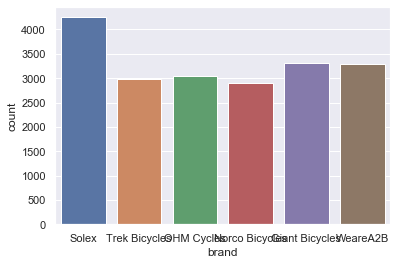

In [95]:
# df1['age'].plot.hist(subplots=True, bins=10)
# df2['brand'].value_counts().sort_index().plot.bar()
sns.countplot(df2['brand'])


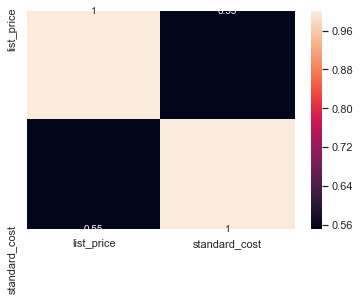

In [112]:
# import numpy as np

# # get correlation matrix
# corr = df2[['list_price','standard_cost']].corr()
# fig, ax = plt.subplots()
# # create heatmap
# im = ax.imshow(corr.values)

# # set labels
# ax.set_xticks(np.arange(len(corr.columns)))
# ax.set_yticks(np.arange(len(corr.columns)))
# ax.set_xticklabels(corr.columns)
# ax.set_yticklabels(corr.columns)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(corr.columns)):
#     for j in range(len(corr.columns)):
#         text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=3),
#                        ha="center", va="center", color="red")
sns.heatmap(df2[['list_price','standard_cost']].corr(), annot=True)


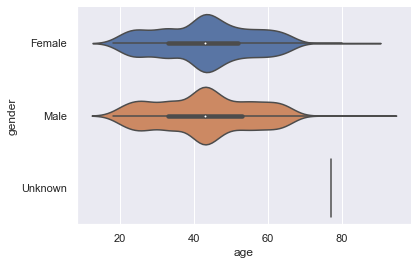

In [113]:
sns.violinplot(df1['age'], df1['gender']) #Variable Plot
sns.despine()


In [83]:
df2[["order_status", "brand"]].groupby("brand").describe(include='object')


order_status                       
                      count unique       top  freq
brand                                             
Giant Bicycles         3312      2  Approved  3283
Norco Bicycles         2910      2  Approved  2885
OHM Cycles             3043      2  Approved  3016
Solex                  4253      2  Approved  4211
Trek Bicycles          2990      2  Approved  2965
WeareA2B               3295      2  Approved  3265

In [ ]:
df2[["order_status", "product_line"]].groupby("product_line").describe(include='object')


In [ ]:
df2[["order_status", "product_class"]].groupby("product_class").describe(include='object')


In [ ]:
df2[["order_status", "product_size"]].groupby("product_size").describe(include='object')


In [ ]:
df2[["order_status", "list_price"]].groupby("order_status").describe()


In [ ]:
df2[["order_status", "standard_cost"]].groupby("order_status").describe()


In [ ]:
df2.info()

In [ ]:
df2.describe(include='object')

In [ ]:
df2[['list_price','standard_cost']].describe()

In [ ]:
col_df2=df2.columns.tolist()
df2_cat=[
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size'
]
for item in df2_cat:
    print(df2[item].value_counts()/len(df2)*100)
    print('====================================')

In [ ]:
df2[['list_price','standard_cost']].corr()


In [ ]:
# !! pip install git+https://github.com/amueller/dabl/
import dabl
dabl.plot(df2, target_col = 'list_price')


In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
df2.plot(ax=ax, x='list_price', y='standard_cost', style='o')
